In [1]:
import scanpy as sc

import pandas as pd
import numpy as np

import tqdm

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib

import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import scipy
from scipy.stats import spearmanr
from scipy.stats import zscore
from scipy.stats import pearsonr
from sklearn.metrics import pairwise_distances

# utils function -- helper functions for plotting
import sys
sys.path.append('../../utils/')
import figure_utils as figure_utils

In [2]:
# %matplotlib inline
# # # matplotlib.rcParams['figure.dpi'] = 500 # 150 dpi resolution
# # matplotlib.rcParams['figure.dpi'] = 2000 # 150 dpi resolution
# # matplotlib.rcParams['image.cmap'] = 'Spectral_r' # preferred color map
# # # matplotlib.rcParams['figure.figsize'] = [6, 6] # Square
# # set matplotlib style -- ggplot

# # set matplotlib style -- ggplot
# style.use('ggplot')

# # config for matplotlib
# matplotlib.rcParams['figure.figsize'] = [5,5]
# matplotlib.rcParams['figure.dpi'] = 2000
# matplotlib.rcParams['image.cmap'] = 'Spectral_r'

# # config for scanpy
# sc.settings.verbosity = 0
# sc.logging.print_header()
# sc.settings.set_figure_params(dpi=100, facecolor='white')


# # no bounding boxes or axis:
# matplotlib.rcParams['axes.spines.bottom'] = "off"
# matplotlib.rcParams['axes.spines.top'] = "off"
# matplotlib.rcParams['axes.spines.left'] = "off"
# matplotlib.rcParams['axes.spines.right'] = "off"

matplotlib.rcParams['figure.dpi'] = 500 # 150 dpi resolution
matplotlib.rcParams['image.cmap'] = 'Spectral_r' # preferred color map
# matplotlib.rcParams['figure.figsize'] = [6, 6] # Square
# no bounding boxes or axis:
matplotlib.rcParams['axes.spines.bottom'] = "off"
matplotlib.rcParams['axes.spines.top'] = "off"
matplotlib.rcParams['axes.spines.left'] = "off"
matplotlib.rcParams['axes.spines.right'] = "off"

%matplotlib inline

In [3]:
# UMAP PARAMS
DOT_SIZE = 25
LEGEND_FONTSIZE = 8
LEGEND_FONTOUTLINE = 1
UMAP_FIGSIZE = (10,10)

# SEXES COLOR
# HERM_COLOR = '#f58020'
# MALE_COLOR = '#1479b8'
# SHARED_SEX_COLOR = '#c2b69b'

# SEXES COLOR -- NEW
HERM_COLOR = '#ff8b00'
MALE_COLOR = '#2258a5'
SHARED_SEX_COLOR = '#349c55'

# AXIS TICK COLORS
AXIS_TICK_COLORS = 'black'

# lighter teal -- EQ
SHEATH_COLOR = '#3ac9c9' # '#369e9e'
SOCKET_COLOR = '#c47841'

# COMPARTMENTS COLOR -- Non-neural, Coelomocyte, Glia, Neuron
COMPARTMENTS_COLOR = ['#c63287','#ff99da','#693996','#fdcd0f']

In [4]:
# load data
adata = sc.read('../../data/WholeData.h5ad')
adata_glia = sc.read('../../data/GliaOnly.h5ad')

# SFig 4A -- 4 Gene Combination Probability Estimates

In [5]:
# get the results
minimalset_results = adata.uns['FiguresData_PanGlial_Selection_Results']['Minimal_Set_Results'].copy()

# get the 4 gene combinations
minimalset_results = minimalset_results.loc[minimalset_results['min_set_label'] == '4_genes',:]

In [6]:
# plot and color by sex of the clusters -- sort
order = minimalset_results.groupby('combination').var() \
            .rename(columns={'mean_probability_estimates':'median_of_means'}) \
            .sort_values(by='median_of_means', ascending=True).index

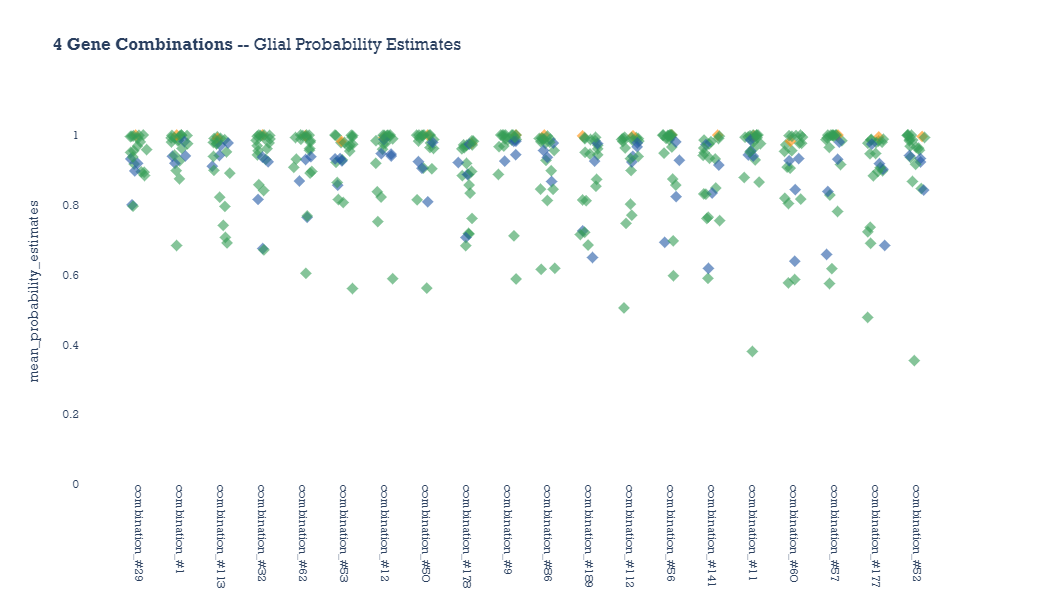

In [7]:
def add_scatter_trace(fig, df, label, y_offset):
    df_label = df[df['combination'] == label]
    fig.add_trace(go.Scatter(
        # x=y_offset + np.random.rand(len(df_label)) * 0.4,  # Adding jitter to x-values
        x = y_offset + np.random.uniform(low=-0.5, high=0.5, size=len(df_label)) * 0.45, # much better implementation of jitter
        y=df_label['mean_probability_estimates'],  # Y-values are the mean_probability_estimates
        mode='markers',
        marker=dict(
            size=9,
            symbol='diamond',
            color=df_label['sex_colors'],
            opacity=0.6,
        ),
        name=label,
        text=df_label['cluster']
    ))

fig = go.Figure()

# take the first 20 combinations
unique_labels = minimalset_results.groupby('combination').var() \
            .rename(columns={'mean_probability_estimates':'median_of_means'}) \
            .sort_values(by='median_of_means', ascending=True).index[:20]

N = len(minimalset_results)
y_offsets = np.arange(len(unique_labels))

for label, y_offset in zip(unique_labels, y_offsets):
    add_scatter_trace(fig, minimalset_results, label, y_offset)

fig.update_layout(showlegend=False, coloraxis_showscale=False, plot_bgcolor='rgba(0,0,0,0)', width=1200,
                  height=600, title='<b>4 Gene Combinations</b> -- Glial Probability Estimates', font=dict(family='Rockwell'))
fig.update_traces(marker_showscale=False)
fig.update_yaxes(title='mean_probability_estimates', range=[0,1.1])  # Update y-axis title & set the range
fig.update_xaxes(tickvals=y_offsets, ticktext=unique_labels, tickangle=90)
fig.write_image('figures/S4A_4-GeneCombination_Probability_Estimates_top20Combo.png')
fig.write_html('figures/S4A_4-GeneCombination_Probability_Estimates_top20Combo.html')
fig.show()

# SFig 4B -- 5 Gene Combination Probability Estimates

In [8]:
# get the results
minimalset_results = adata.uns['FiguresData_PanGlial_Selection_Results']['Minimal_Set_Results'].copy()

# get the 5 gene combinations
minimalset_results = minimalset_results.loc[minimalset_results['min_set_label'] == '5_genes',:]

In [9]:
# plot and color by sex of the clusters -- sort
order = minimalset_results.groupby('combination').var() \
            .rename(columns={'mean_probability_estimates':'median_of_means'}) \
            .sort_values(by='median_of_means', ascending=True).index

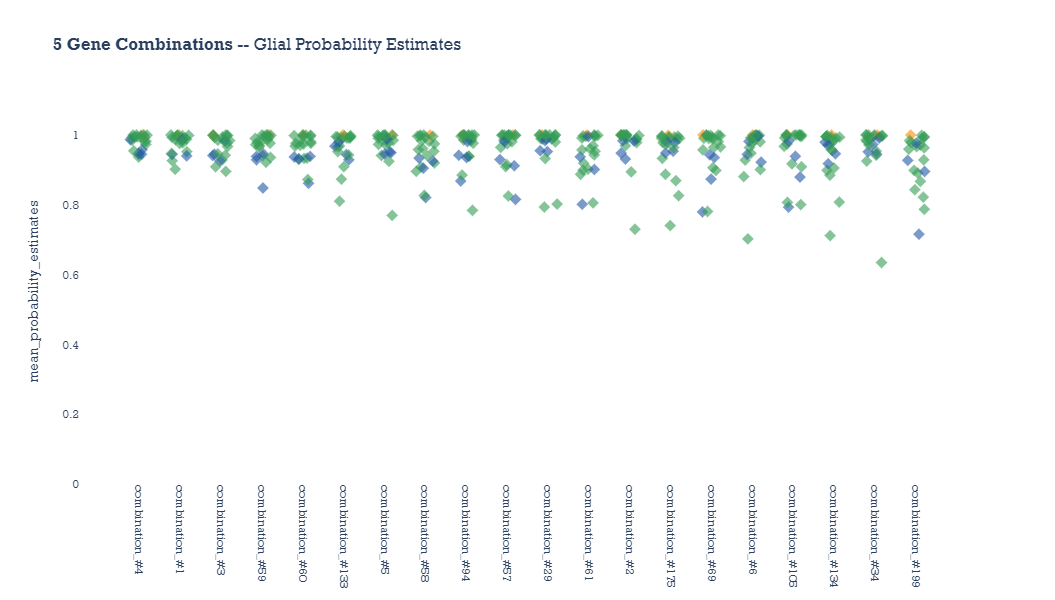

In [10]:
def add_scatter_trace(fig, df, label, y_offset):
    df_label = df[df['combination'] == label]
    fig.add_trace(go.Scatter(
        # x=y_offset + np.random.rand(len(df_label)) * 0.4,  # Adding jitter to x-values
        x = y_offset + np.random.uniform(low=-0.5, high=0.5, size=len(df_label)) * 0.45, # much better implementation of jitter
        y=df_label['mean_probability_estimates'],  # Y-values are the mean_probability_estimates
        mode='markers',
        marker=dict(
            size=9,
            symbol='diamond',
            color=df_label['sex_colors'],
            opacity=0.6,
        ),
        name=label,
        text=df_label['cluster']
    ))

fig = go.Figure()

# take the first 20 combinations
unique_labels = minimalset_results.groupby('combination').var() \
            .rename(columns={'mean_probability_estimates':'median_of_means'}) \
            .sort_values(by='median_of_means', ascending=True).index[:20]

N = len(minimalset_results)
y_offsets = np.arange(len(unique_labels))

for label, y_offset in zip(unique_labels, y_offsets):
    add_scatter_trace(fig, minimalset_results, label, y_offset)

fig.update_layout(showlegend=False, coloraxis_showscale=False, plot_bgcolor='rgba(0,0,0,0)', width=1200,
                  height=600, title='<b>5 Gene Combinations</b> -- Glial Probability Estimates', font=dict(family='Rockwell'))
fig.update_traces(marker_showscale=False)
fig.update_yaxes(title='mean_probability_estimates', range=[0,1.1])  # Update y-axis title & set the range
fig.update_xaxes(tickvals=y_offsets, ticktext=unique_labels, tickangle=90)
fig.write_image('figures/S4B_5-GeneCombination_Probability_Estimates_top20Combo.png')
fig.write_html('figures/S4B_5-GeneCombination_Probability_Estimates_top20Combo.html')
fig.show()

# SFig 4C -- 5 Gene Combination, <i>combination_#4</i>

In [11]:
#  get combination -- combination_#4
minimal_combo = minimalset_results.loc[minimalset_results['combination'] == 'combination_#4','gene_combo'].unique().item()
minimal_combo

"('col-34', 'gst-28', 'F35C5.12', 'C05B5.8', 'glb-1')"

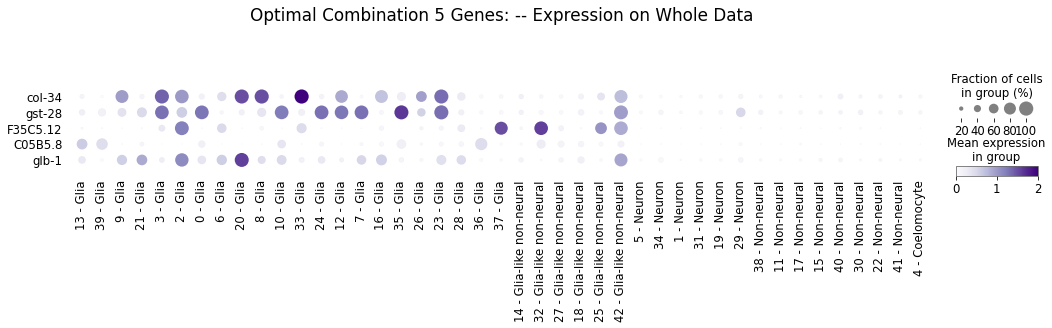

In [12]:
# the final results of our pan glia analysis
markers = minimal_combo.replace("(", "").replace(")", "").replace('\'',"").split(', ')

# ordering of the compartments
glia_mask = pd.Series(adata.obs['cluster_comp'].unique()).str.endswith('Glia')
glia_cluster = pd.Series(adata.obs['cluster_comp'].unique())[glia_mask].values.tolist()

glia_like_mask = pd.Series(adata.obs['cluster_comp'].unique()).str.contains('Glia-like')
glia_like_cluster = pd.Series(adata.obs['cluster_comp'].unique())[glia_like_mask].values.tolist()

neuron_mask = pd.Series(adata.obs['cluster_comp'].unique()).str.contains('Neuron')
neuron_cluster = pd.Series(adata.obs['cluster_comp'].unique())[neuron_mask].values.tolist()

coelomocyte_mask = pd.Series(adata.obs['cluster_comp'].unique()).str.contains('Coelomocyte')
coelomocyte_cluster = pd.Series(adata.obs['cluster_comp'].unique())[coelomocyte_mask].values.tolist()

anatomical_mask = pd.Series(adata.obs['cluster_comp'].unique()).str.contains('Non-neural')
anatomical_cluster = pd.Series(adata.obs['cluster_comp'].unique())[anatomical_mask].values.tolist()

category_order = glia_cluster + glia_like_cluster + neuron_cluster + anatomical_cluster + coelomocyte_cluster

# visualize the markers using scanpy -- var_names takes in the 'markers' dictionary we've defined containing the genes we've identified
with matplotlib.pyplot.rc_context({'axes.edgecolor':'dimgray', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white','font.size':14}):
    all_data = sc.pl.dotplot(adata, var_names=markers, groupby='cluster_comp', use_raw=False, categories_order=category_order,\
                             dendrogram=False, swap_axes=True, title='Optimal Combination 5 Genes: -- Expression on Whole Data', vmax=2, return_fig=True, cmap='Purples')
    all_data.dot_edge_lw = 0.01
    
    # fix the aesthetics
    all_data.get_axes()['mainplot_ax'].axes.tick_params(axis='both', which='both',length=0.01)
    
    # color the texts based on whether the cluster belongs to Sheath or Socket Class
    # xticks = all_data.get_axes()['mainplot_ax'].axes.get_xticklabels()
    # for tick in xticks:
    #     if tick.get_text() in EXCLUDE_CLUSTERS:
    #        tick.set_color('red')
    #     else:
    #        tick.set_color('black')
    plt.savefig('figures/S4B_5-GeneCombo-Combination4.png', bbox_inches='tight')    

# SFig 4D -- 6 Gene Combination Probability Estimates

In [13]:
# get the results
minimalset_results = adata.uns['FiguresData_PanGlial_Selection_Results']['Minimal_Set_Results'].copy()

# get the 6 gene combinations
minimalset_results = minimalset_results.loc[minimalset_results['min_set_label'] == '6_genes',:]

In [14]:
# plot and color by sex of the clusters -- sort
order = minimalset_results.groupby('combination').var() \
            .rename(columns={'mean_probability_estimates':'median_of_means'}) \
            .sort_values(by='median_of_means', ascending=True).index

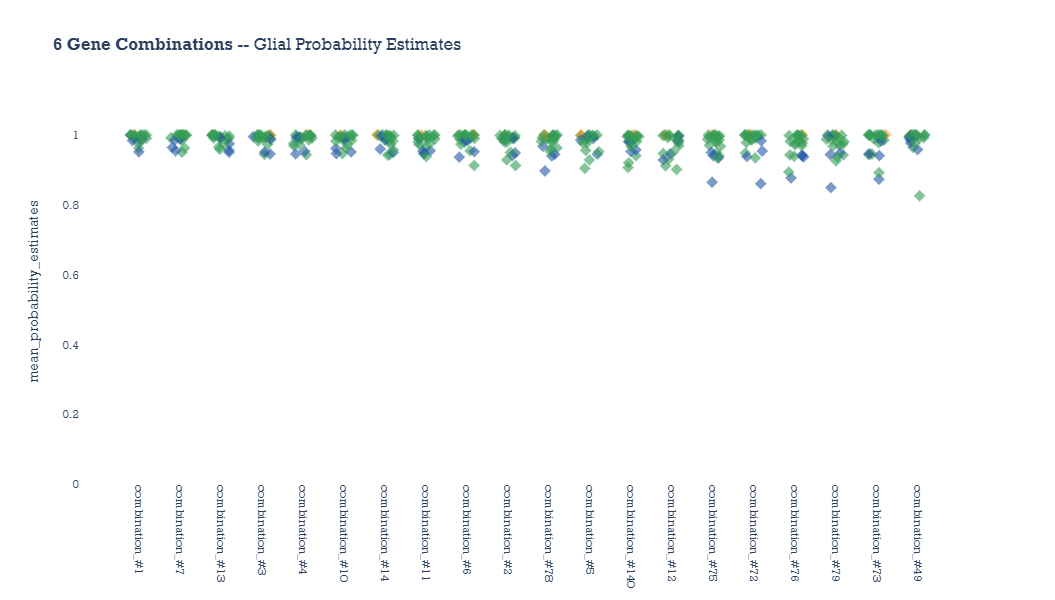

In [15]:
def add_scatter_trace(fig, df, label, y_offset):
    df_label = df[df['combination'] == label]
    fig.add_trace(go.Scatter(
        # x=y_offset + np.random.rand(len(df_label)) * 0.4,  # Adding jitter to x-values
        x = y_offset + np.random.uniform(low=-0.5, high=0.5, size=len(df_label)) * 0.45, # much better implementation of jitter
        y=df_label['mean_probability_estimates'],  # Y-values are the mean_probability_estimates
        mode='markers',
        marker=dict(
            size=9,
            symbol='diamond',
            color=df_label['sex_colors'],
            opacity=0.6,
        ),
        name=label,
        text=df_label['cluster']
    ))

fig = go.Figure()

# take the first 20 combinations
unique_labels = minimalset_results.groupby('combination').var() \
            .rename(columns={'mean_probability_estimates':'median_of_means'}) \
            .sort_values(by='median_of_means', ascending=True).index[:20]

N = len(minimalset_results)
y_offsets = np.arange(len(unique_labels))

for label, y_offset in zip(unique_labels, y_offsets):
    add_scatter_trace(fig, minimalset_results, label, y_offset)

fig.update_layout(showlegend=False, coloraxis_showscale=False, plot_bgcolor='rgba(0,0,0,0)', width=1200,
                  height=600, title='<b>6 Gene Combinations</b> -- Glial Probability Estimates', font=dict(family='Rockwell'))
fig.update_traces(marker_showscale=False)
fig.update_yaxes(title='mean_probability_estimates', range=[0,1.1])  # Update y-axis title & set the range
fig.update_xaxes(tickvals=y_offsets, ticktext=unique_labels, tickangle=90)
fig.write_image('figures/S4D_6-GeneCombination_Probability_Estimates_top20Combo.png')
fig.write_html('figures/S4D_6-GeneCombination_Probability_Estimates_top20Combo.html')
fig.show()

# SFig 4E -- 6 Gene Combination, <i>combination_#7</i> on the Calico Aging Atlas

In [16]:
#  get combination -- combination_#4
minimal_combo = minimalset_results.loc[minimalset_results['combination'] == 'combination_#7','gene_combo'].unique().item()
select_markers = minimal_combo.replace("(", "").replace(")", "").replace('\'',"").split(', ')
select_markers

['col-34', 'gst-28', 'F35C5.12', 'C05B5.8', 'cnc-10', 'glb-1']

In [17]:
# load in the log normalized dataset
adata_roux = sc.read('calico_data/ad_worm_aging_lognormalized.h5ad')
adata_roux

AnnData object with n_obs × n_vars = 47423 × 20305
    obs: 'n_counts', 'n_genes', 'timepoint', 'annotate_name', 'Cell_type', 'TissueType'
    var: 'gene_ids', 'gene_names', 'gene_class', 'n_counts', 'n_cells'
    uns: 'Cell_type_colors', 'annotate_name_colors', 'log1p', 'timepoint_colors'
    obsm: 'X_umap', 'scvi'
    layers: 'denoised'

In [18]:
# create the data to plot
# for each group -- filter the adata.obs dataframe for the following indices -- store the results in a list to be concatented in the end 
df_obs = adata_roux.obs.copy()
gene_targets = select_markers
compute_mean=True
list_df = []

for timepoint, cluster in tqdm.tqdm(df_obs.groupby(['timepoint','Cell_type']).count().index, total=1080, desc='Gathering Expressions'):
    # check if we can query the following combination
    try:
        # subset the data set with respect to time point and cell type
        adata_filter = adata_roux[(adata_roux.obs['timepoint'] == timepoint) & (adata_roux.obs['Cell_type'] == cluster),gene_targets].copy()
        
        # create a dataframe and compute the gene mean/median expression of specified gene targets along
        if compute_mean:
            meta_df = pd.DataFrame(adata_filter.X.copy().mean(axis=0), columns=gene_targets, index=[f'{cluster}_{timepoint}'])
        else:
            exp_df_median = pd.DataFrame(adata_gileter.X.copy(), index=adata_filter.obs_names, columns=adata_filter.var_names)
            meta_df = pd.DataFrame(exp_df_median.median(axis=0), columns=adata_filter.var_names, index=[f'{cluster}_{timepoint}'])
        
        # add metadata information -- timepoint and Cell_type -- Cell_type info will be use to map
        # clusters to their respective tissue type later
        meta_df.loc[:,'timepoint'] = timepoint
        meta_df.loc[:,'Cell_type'] = cluster
        
        # add the dataframe to the list_df
        list_df.append(meta_df)
    except:
        # if the subsetting fails above to subset the data from -- fill it with zero
        metalt_df = pd.DataFrame(0.0, index=[f'{cluster}_{timepoint}'], columns=gene_targets)
        metalt_df.loc[:,'timepoint'] = timepoint
        metalt_df.loc[:,'Cell_type'] = cluster
        
        # add it to the list_df
        list_df.append(metalt_df)

        
# concatenate the data frames in to one master dataframe and add -- add TissueType annotation
concat_df = pd.concat(list_df)
concat_df.loc[:,'TissueType'] = concat_df.loc[:,'Cell_type'].map(dict(adata_roux.obs.loc[:,['Cell_type','TissueType']].values))

# order the 180 unique clusters in the dataframe
category_order = []
compartments = concat_df.loc[concat_df['timepoint'] == 'd1',:].groupby('TissueType').groups.keys()
for comp in compartments:
    comp_contents = concat_df.loc[concat_df['timepoint'] == 'd1',:].groupby('TissueType').get_group(comp).loc[:,'Cell_type'].unique().tolist()
    category_order += comp_contents

Gathering Expressions: 100%|███████████████████████████████████████████████████████| 1080/1080 [00:05<00:00, 185.89it/s]


In [22]:
def calico_plot_gene_sets(dataframe, timepoint, category_order, colormap='Purples', save_path=None):
    '''
        Custom Function to plot our genes in the Calico Data
    '''
    
    # add a color label to the concatenated data frame
    tissue_lut = dict(zip(dataframe['TissueType'].unique(), ['salmon', 'palegreen', 'lavender', 'cornflowerblue', 'orange']))
    dataframe.loc[:, 'tissue_color'] = dataframe['TissueType'].map(tissue_lut)

    # Filter and reorder the dataframe using category order
    filtered_samples = dataframe.loc[dataframe['timepoint'] == timepoint, :].set_index('Cell_type').loc[category_order, :].copy()

    # Map the compartments to their corresponding colors
    tissue_colormap = dict(zip(filtered_samples.loc[:, 'tissue_color'].index, filtered_samples.loc[:, 'tissue_color']))

    # Plot the heatmap
    heatmap = sns.clustermap(
        filtered_samples.iloc[:, :6].T, cmap=colormap,
        row_cluster=False,
        col_colors=filtered_samples.index.map(tissue_colormap),
        figsize=(40, 8),
        linewidth=0.005,
        dendrogram_ratio=0.09,
        col_cluster=False,
        linecolor='white',
        vmax=4,
        xticklabels=True,
        cbar_pos=None
    )
    heatmap.ax_heatmap.set_xlabel('')
    heatmap.ax_heatmap.set_yticklabels(heatmap.ax_heatmap.get_ymajorticklabels(), fontsize=30, rotation=0)
    heatmap.ax_heatmap.axes.tick_params(axis='both', which='both', length=0.01)

    if save_path:
        heatmap.savefig(f'{save_path}.png', bbox_inches='tight')
        heatmap.savefig(f'{save_path}.svg', bbox_inches='tight')
    plt.show()

timepoint:d1


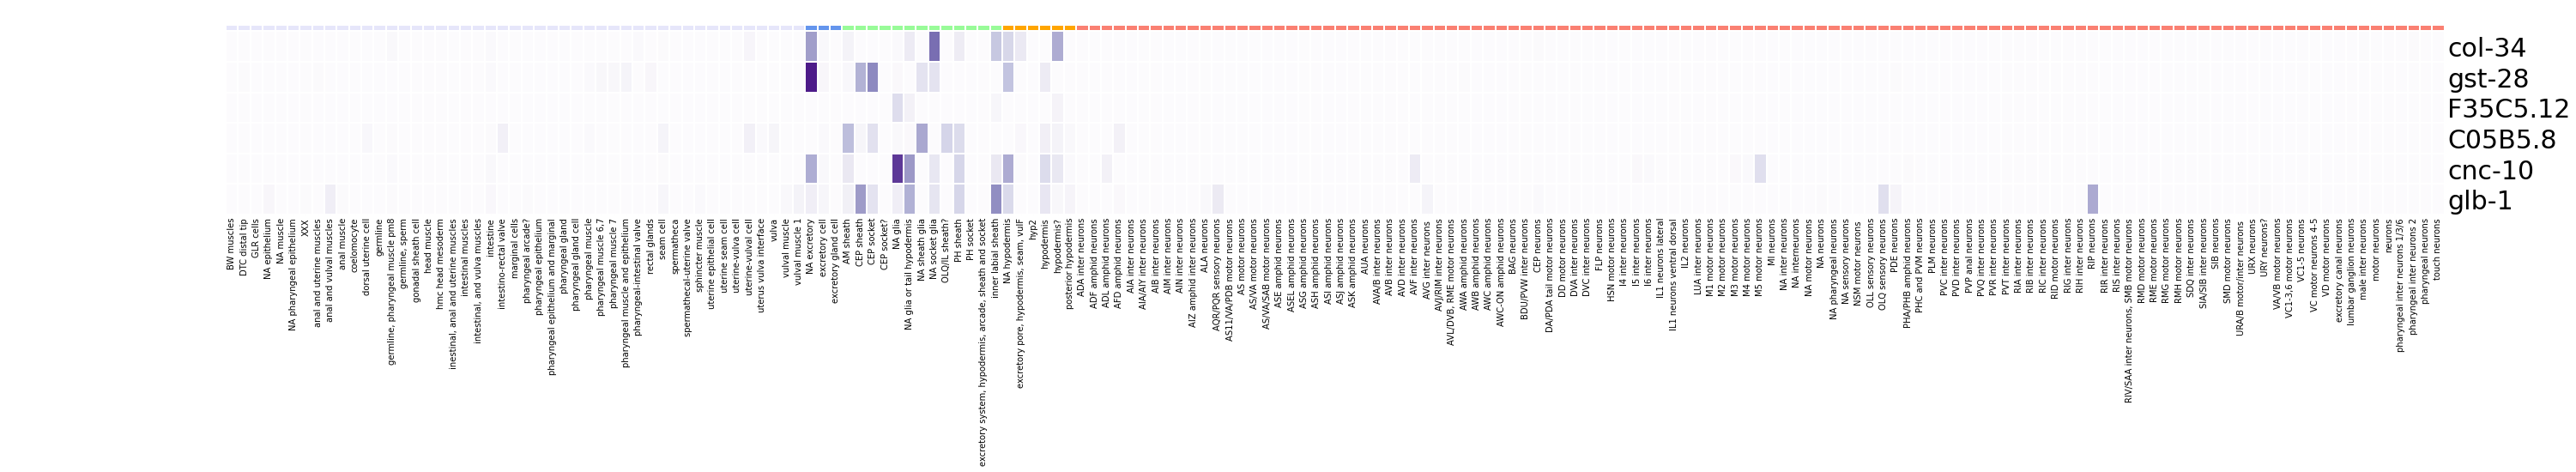

timepoint:d3


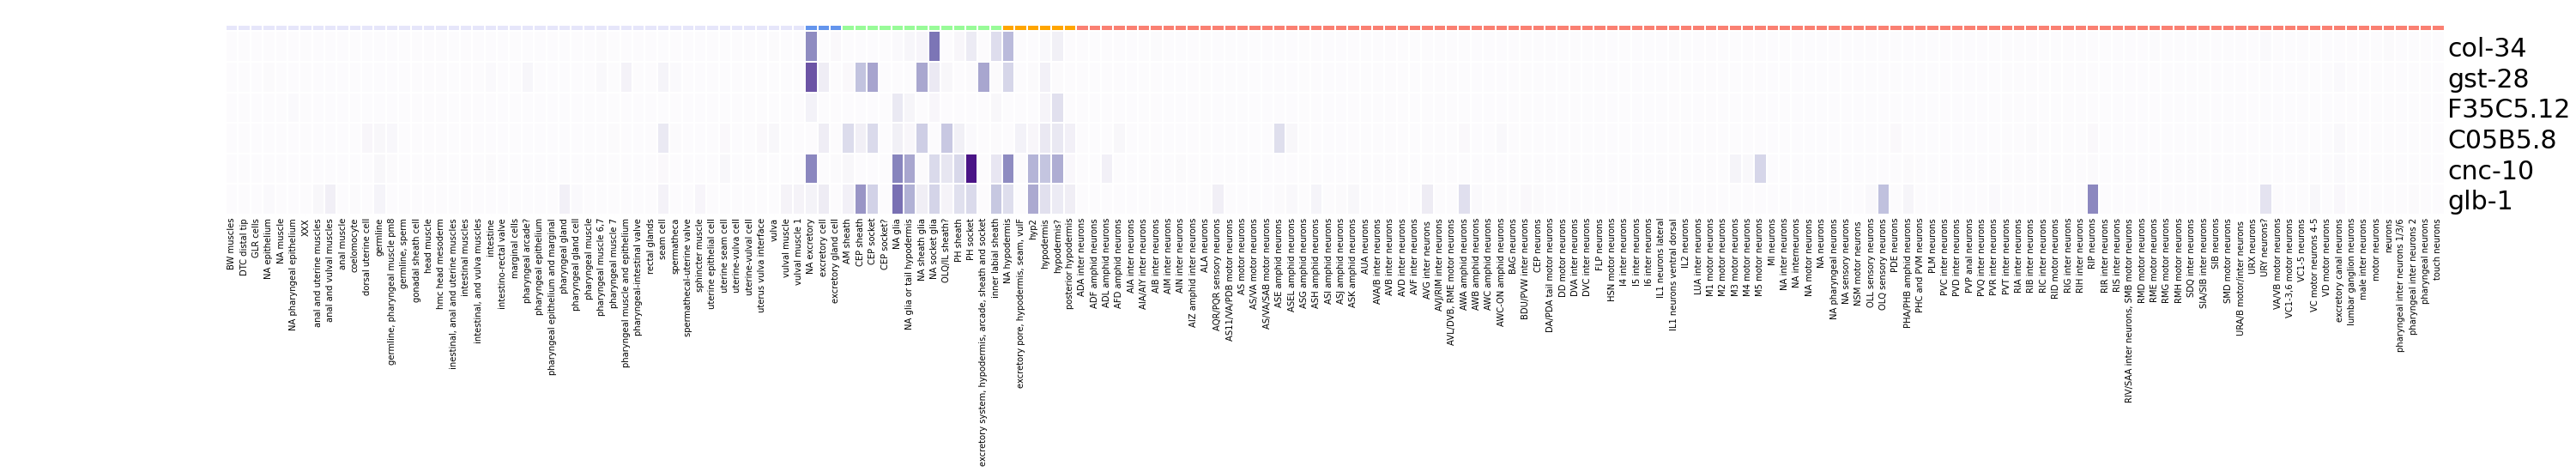

timepoint:d5


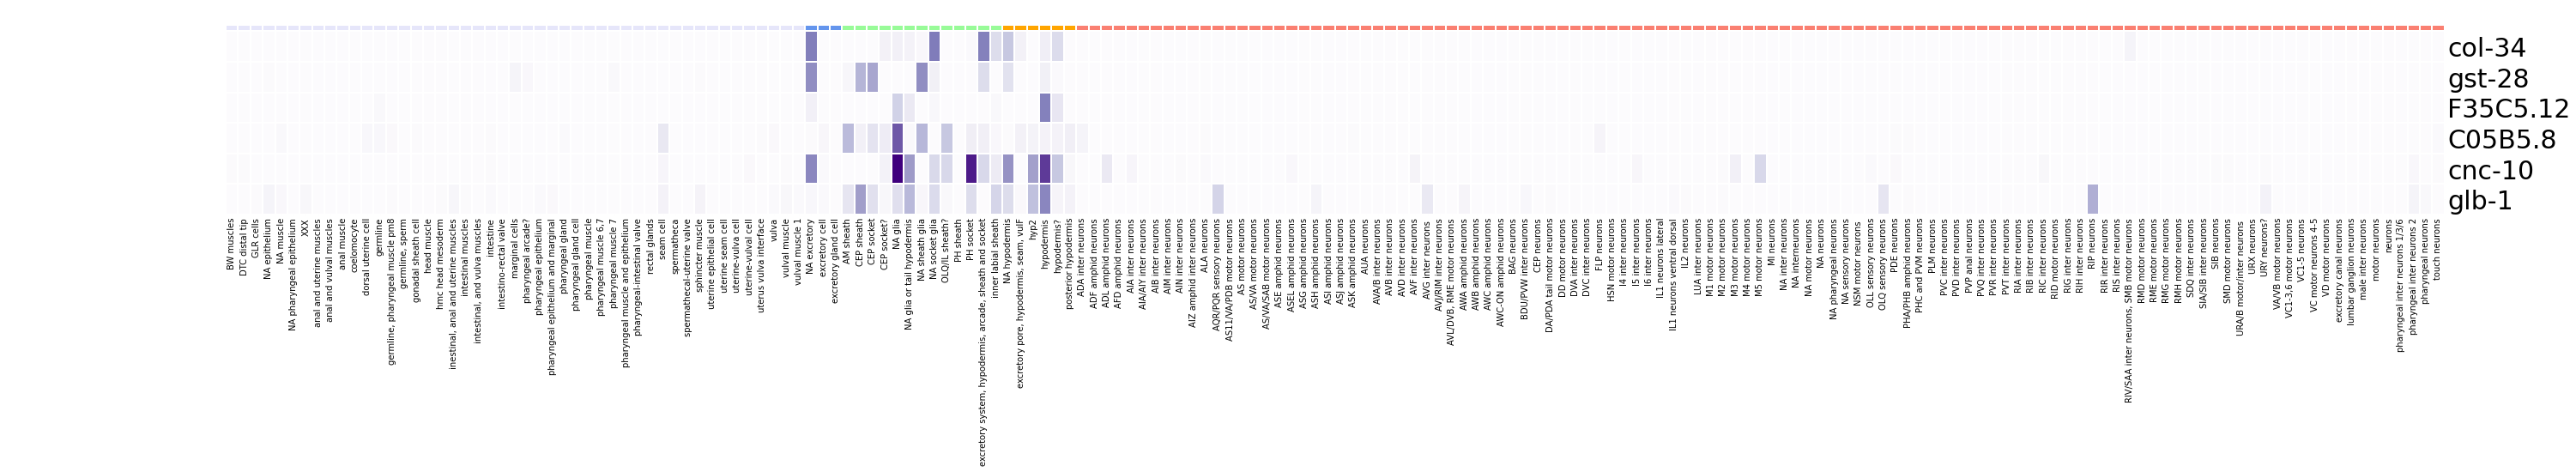

timepoint:d8


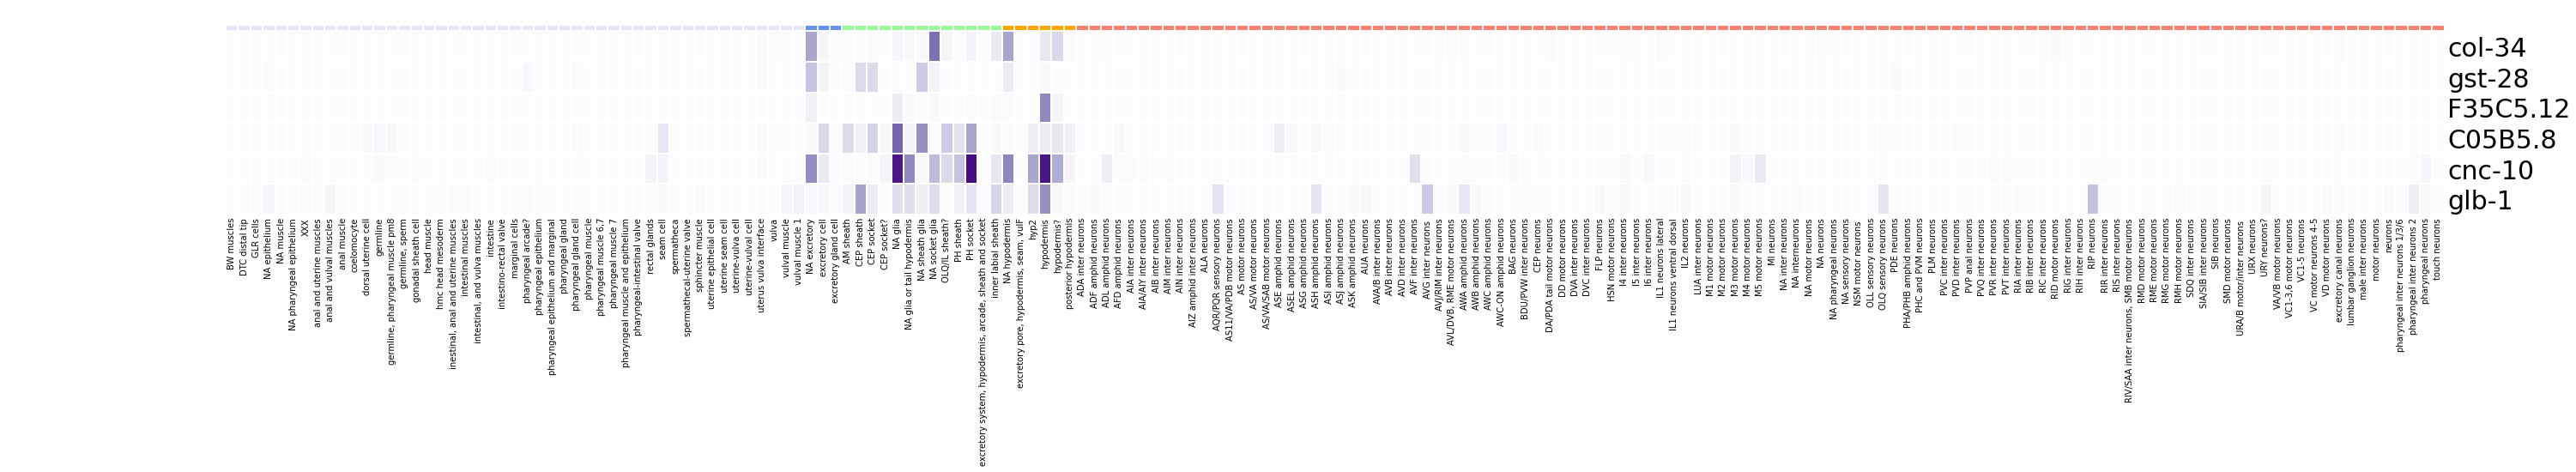

timepoint:d11


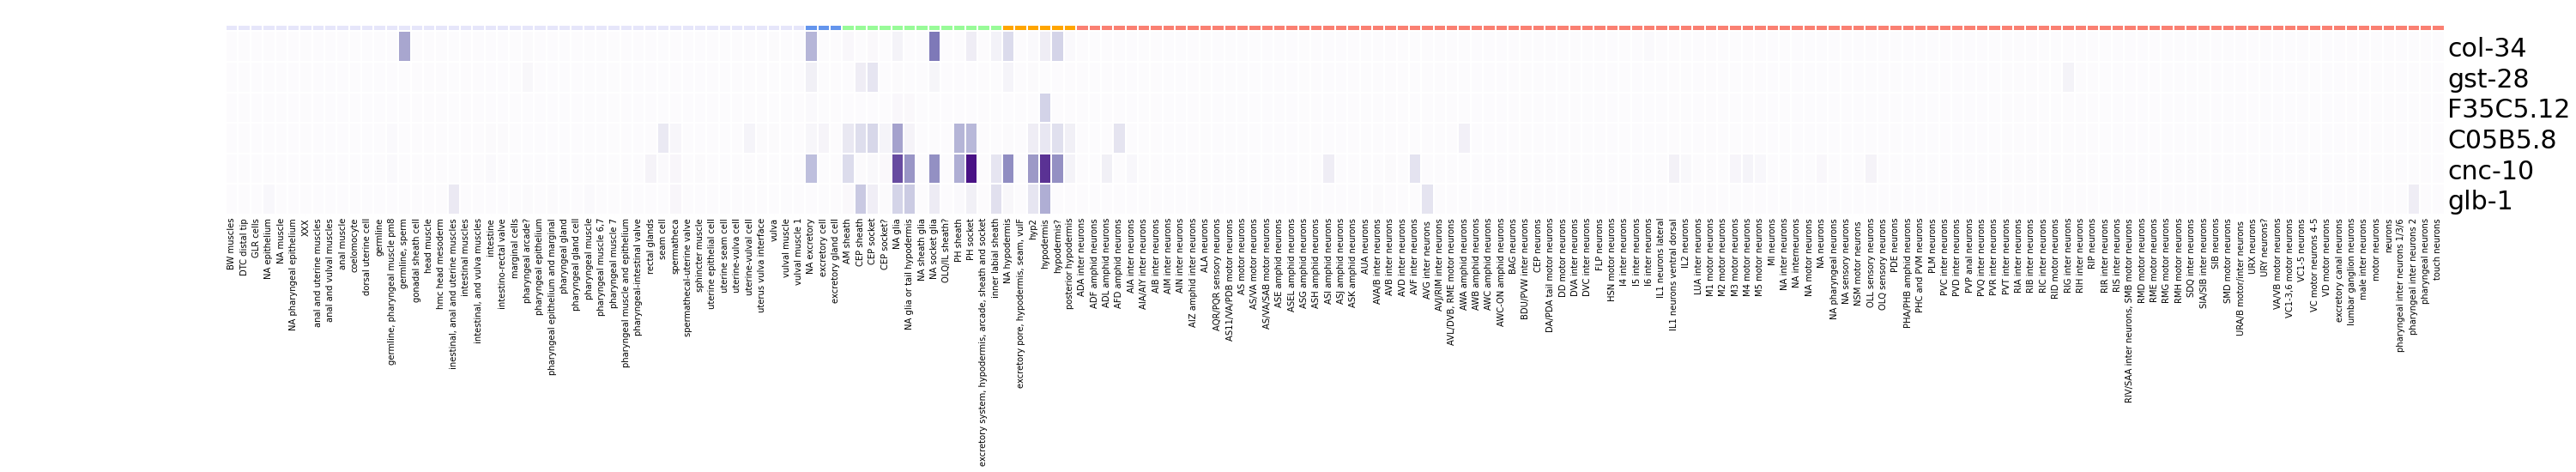

timepoint:d15


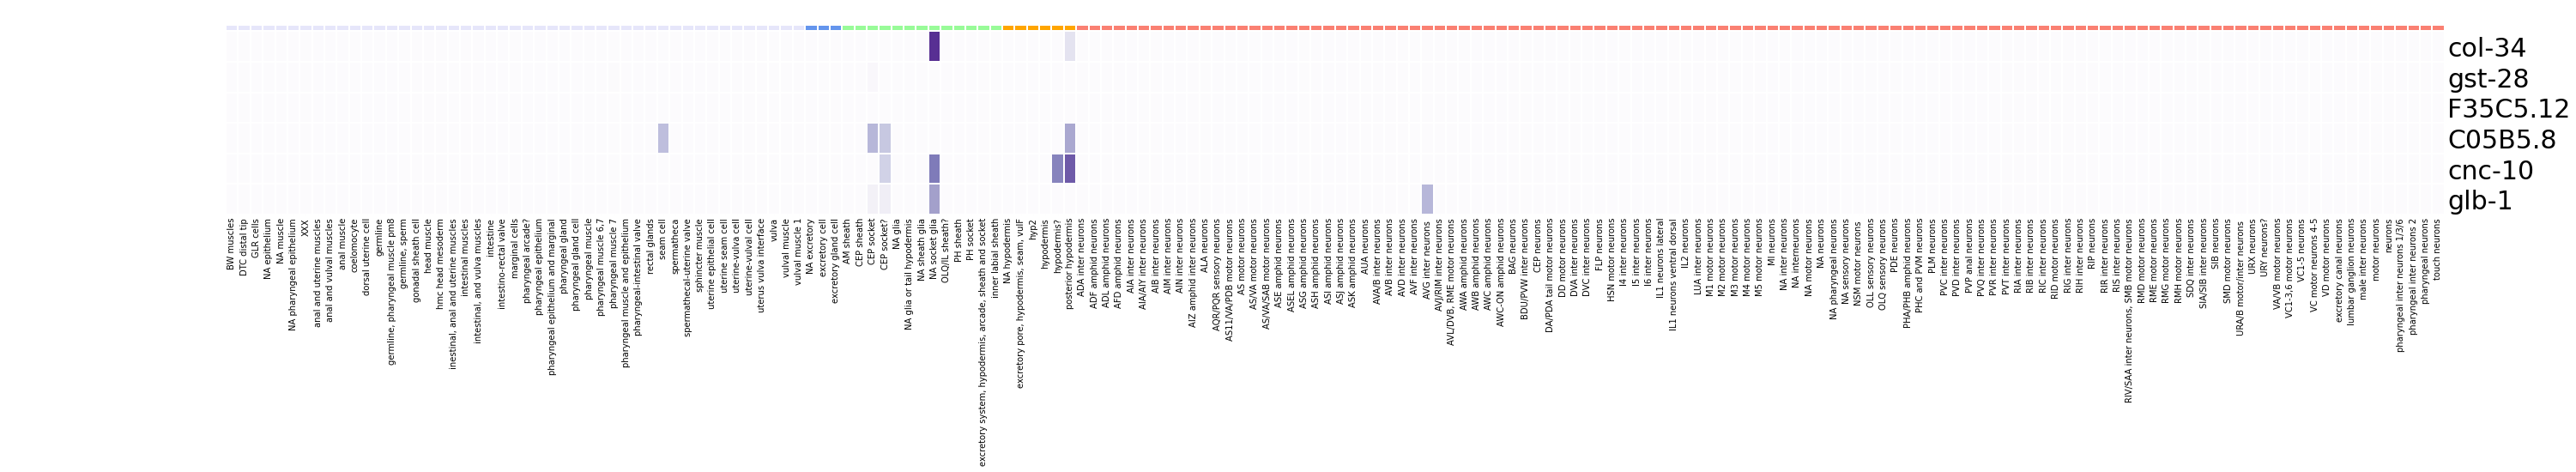

In [23]:
# plot the genes using function above -- for each time point
timepoints = concat_df.timepoint.unique()
for time in timepoints:
    print(f'timepoint:{time}')
    calico_plot_gene_sets(dataframe=concat_df, timepoint=time, category_order=category_order, 
                          save_path=f'figures/S4E_Calico_{time}_PanGlia')